In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df1 = pd.read_csv("./2020_01-06.csv",sep=",",encoding="big5")

In [ ]:
df1 = df1[["縣市","鄉鎮市區","月份","觀測日期","平均溫度","日雨量"]]

In [ ]:
df2 = df1[(df1["縣市"]=="臺北市")]

In [ ]:

df2 = df2[df2["平均溫度"] >= -10]
df2

In [ ]:
df3 = df1.groupby(["縣市","月份","觀測日期"])["日雨量"].max()

In [ ]:
df4 = pd.DataFrame(columns=['縣市', '月份','觀測日期', '日雨量'])

In [ ]:
for i in range(len(df3)):
    df4.loc[i,"縣市"] = df3.index[i][0]
    df4.loc[i,"月份"] = df3.index[i][1]
    df4.loc[i,"觀測日期"] = df3.index[i][2]
    df4.loc[i,"日雨量"] = df3.values[i]

In [ ]:
df4 = df4.astype({"月份":"int32"})
df4

In [ ]:
df5 = df1.groupby(["縣市","月份","觀測日期"])["平均溫度"].max()

In [ ]:
df6 = pd.DataFrame(columns=['縣市',"月份", '觀測日期', '平均溫度'])

In [ ]:
for i in range(len(df5)):
    df6.loc[i,"縣市"] = df5.index[i][0]
    df6.loc[i,"月份"] = df5.index[i][1]
    df6.loc[i,"觀測日期"] = df5.index[i][2]
    df6.loc[i,"平均溫度"] = df5.values[i]

In [ ]:
df4 = df4.astype({"月份":"int32"})
df6

In [ ]:
df7 =pd.merge(df4,df6)

In [ ]:
df7 = df7[df7["縣市"] != "臺北市"]

In [ ]:
df8 = pd.concat([df2,df7], join='outer',ignore_index=True)
df8

In [ ]:
for i in df8.index:
    if df8["平均溫度"][i] >=30:
        df8.loc[i,"over30C"] = 1
    else:
        df8.loc[i,"over30C"] = 0



In [ ]:
for i in df8.index:
    if df8["日雨量"][i] > 0:
        df8.loc[i,"rain"] = 1
    else:
        df8.loc[i,"rain"] = 0

In [ ]:
for i in df8.index:
    df8.loc[i,"garbage"] = 0

In [ ]:
df9 =df8[df8['縣市'] != '臺北市']

In [ ]:
df8_grouped = df8.groupby(["鄉鎮市區","月份"]).sum()
# plt.plot(df8_grouped['over30C']['臺北市']['中山區'])
df8_grouped

In [ ]:
gdf1 = pd.read_excel("./g_tp.xlsx",index_col="月份")#,sep=",")#,encoding="big5")

In [ ]:

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,40))
gdf1_minmax = min_max_scaler.fit_transform(gdf1)
gdf2 = pd.DataFrame(gdf1_minmax,columns = gdf1.columns,index = gdf1.index )

In [ ]:
for i in gdf2.columns:
    for j in gdf2.index:
        df8_grouped['garbage'][i][j] = gdf2.loc[j,i]


In [ ]:
# df8_grouped.to_csv("./weather_garbage.csv",encoding="utf-8-sig")

In [ ]:
# df8_grouped['garbage']["中山區"]
for i in df8_grouped.index:
    print(i[0])

In [ ]:
# a = 1
# for i in gdf2.columns:
#     fig = plt.figure(figsize=(10,5))
#     l1 = plt.plot(df8_grouped['over30C'][i])
#     l2 = plt.plot(df8_grouped['rain'][i])
#     l3 = plt.plot(df8_grouped['garbage'][i])
#     plt.title(f"Zone {a}")
#     plt.legend([l1,l2,l3],["TEM_OVER_30","RAIN","GARBAGE"],loc='upper left')
#     plt.xlabel('MOMTH')
#     plt.ylabel('RAIN AND TEM_OVER_30 DAYS')
#     a+=1
    # plt.savefig('D:\\python_practice\\匯出的圖片.png')

In [ ]:
df9_grouped = df9.groupby(["縣市","月份"]).sum()

In [ ]:
gdf3 = pd.read_excel("./g_sumary.xlsx",index_col="月份")

In [ ]:
gdf3_minmax = min_max_scaler.fit_transform(gdf3)
gdf4 = pd.DataFrame(gdf3_minmax,columns = gdf3.columns,index = gdf3.index )

In [ ]:
for i in gdf4.columns:
    for j in gdf4.index:
        df9_grouped['garbage'][i][j] = gdf4.loc[j,i]

In [ ]:
# df9_grouped.to_csv("./city_without_tp.csv",encoding="utf-8-sig")

In [ ]:
df_final = pd.concat([df8_grouped, df9_grouped])

In [ ]:
df_final.to_csv("./rain_garbage_final.csv",encoding="utf-8-sig")

In [ ]:
gdf = pd.read_csv('./garbage_final.csv',encoding='utf-8')

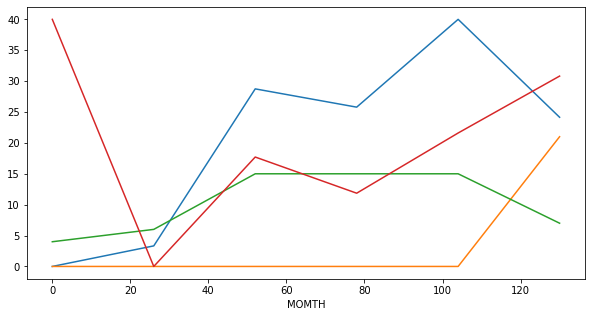

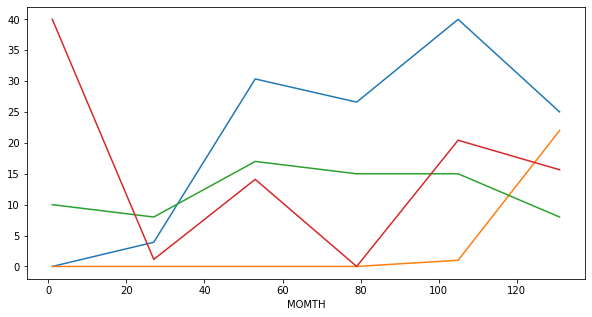

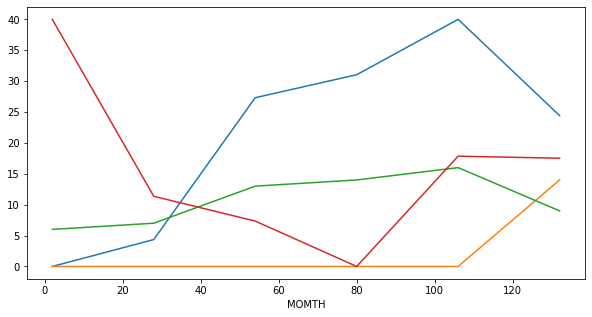

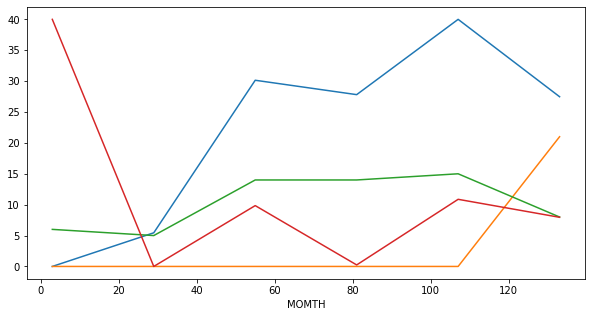

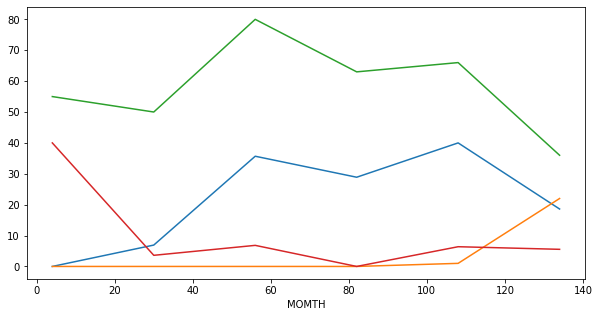

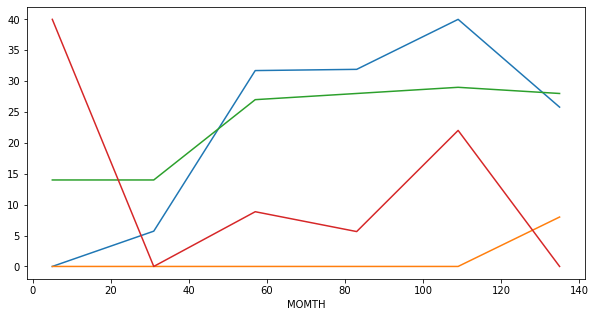

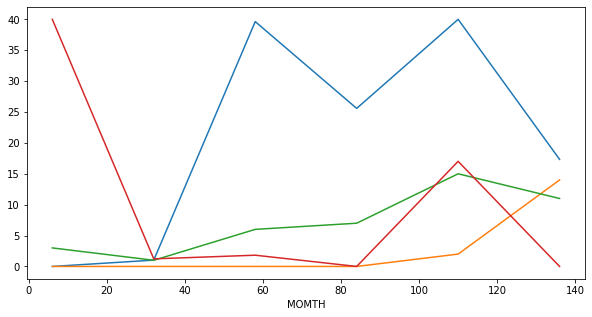

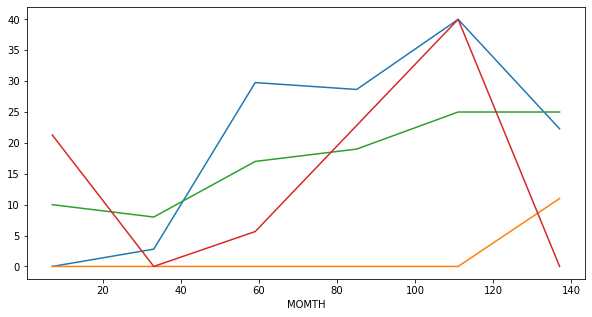

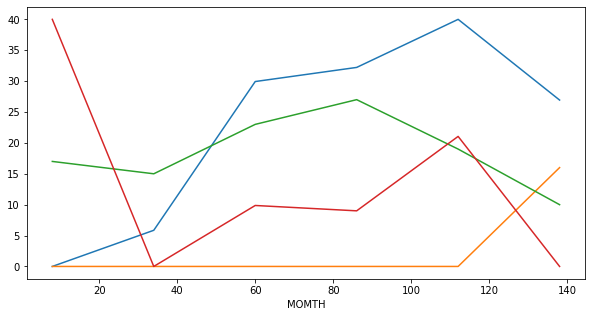

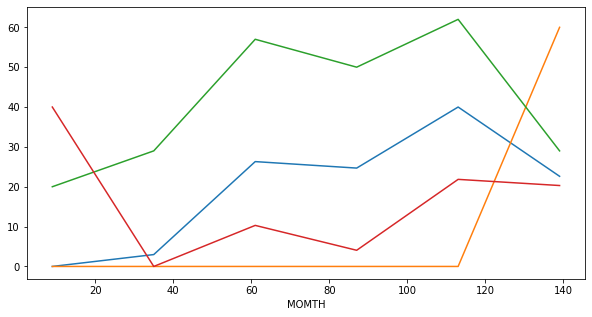

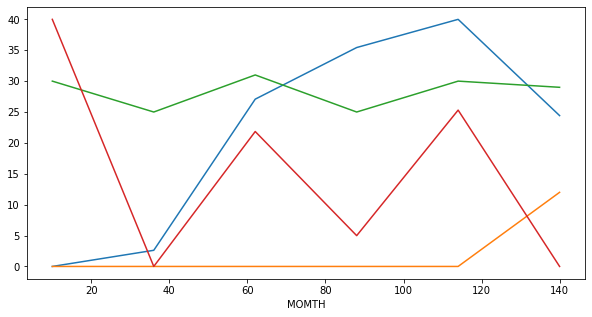

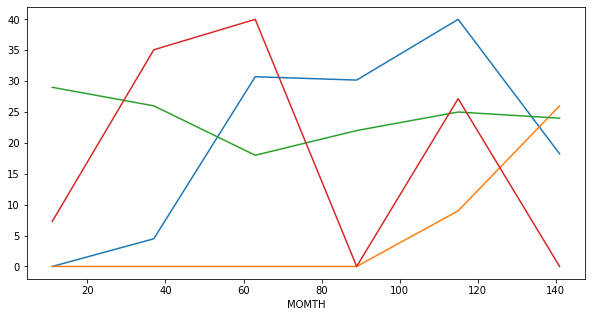

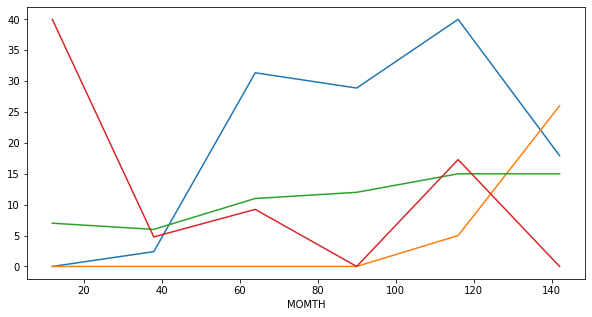

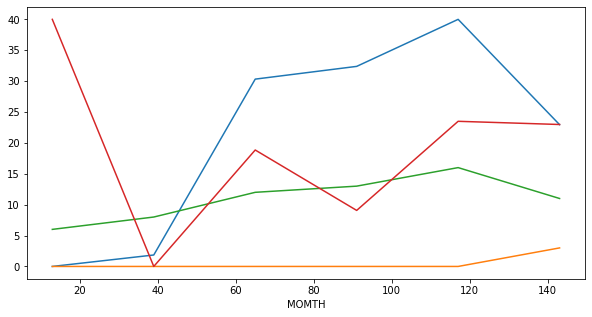

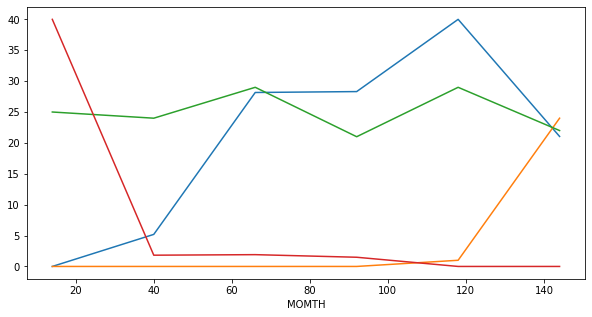

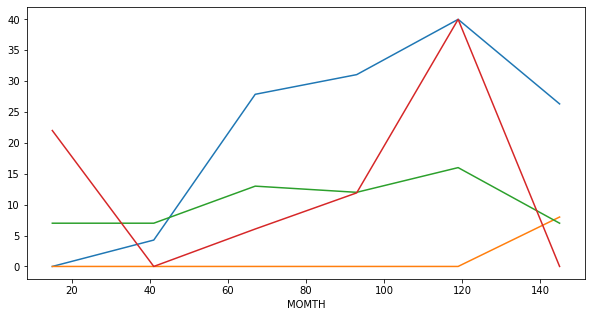

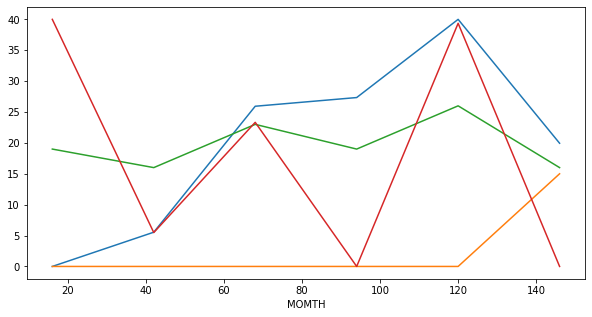

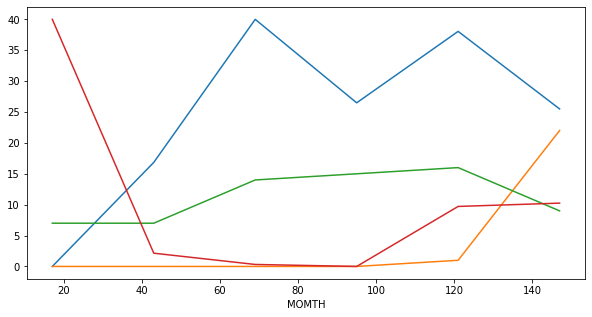

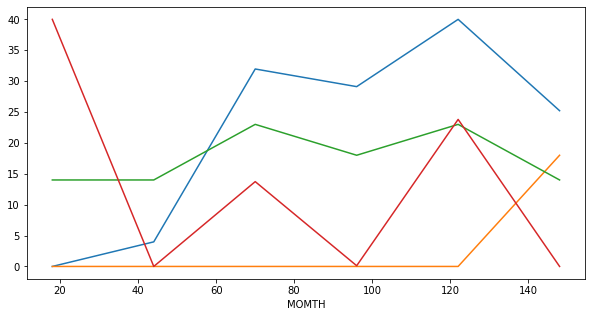

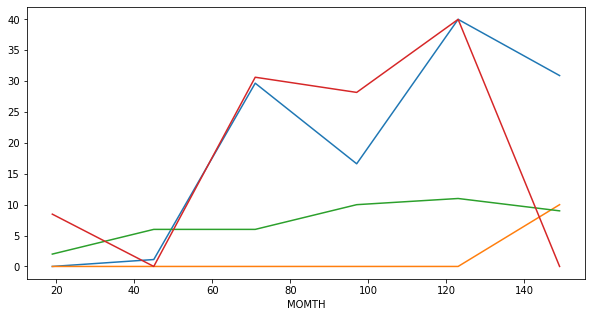

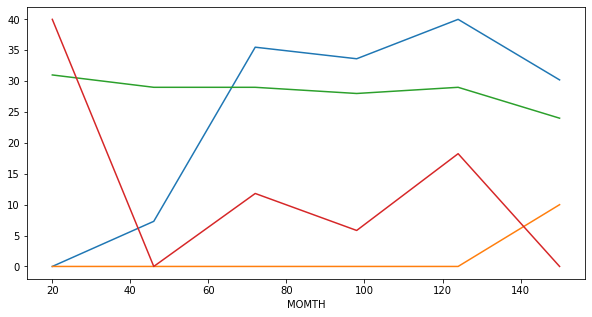

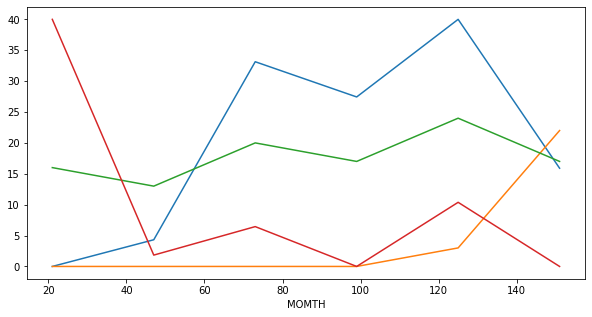

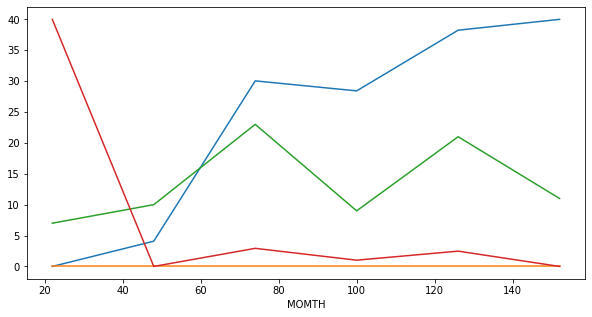

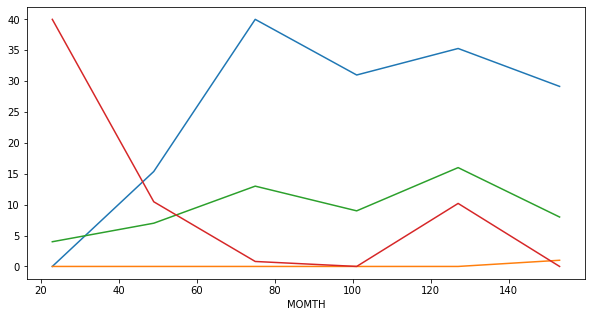

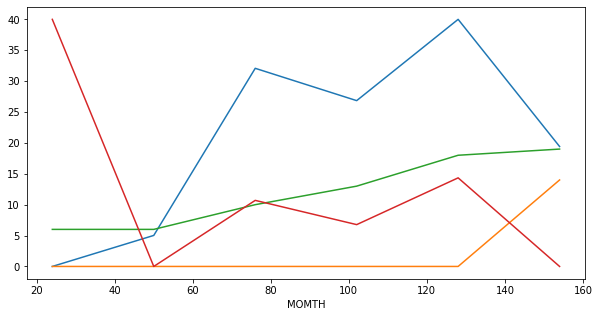

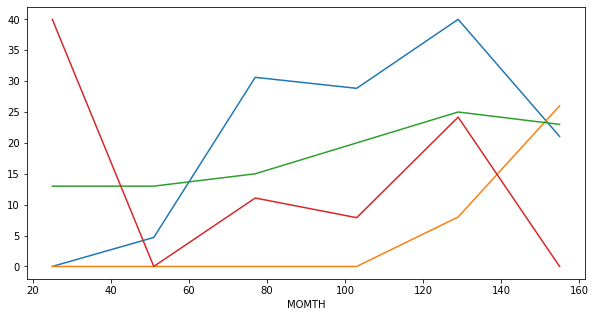

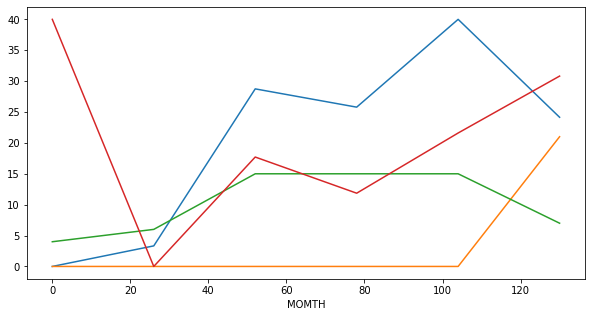

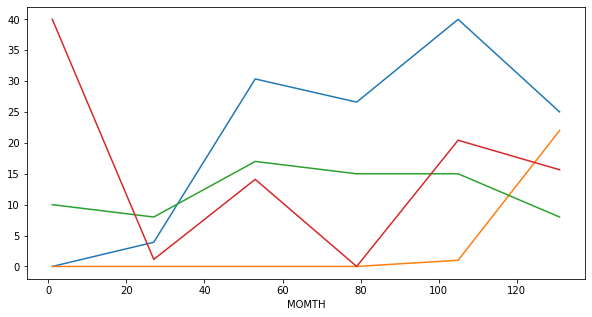

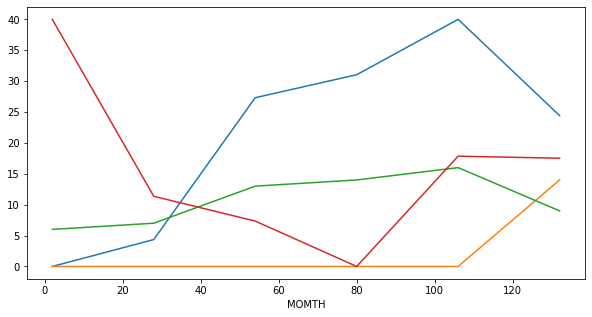

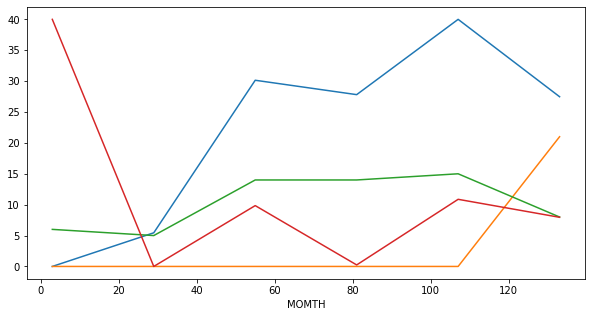

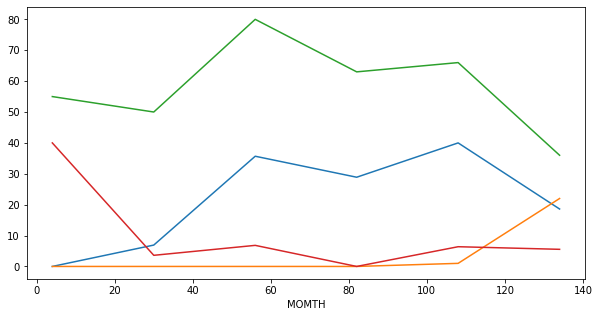

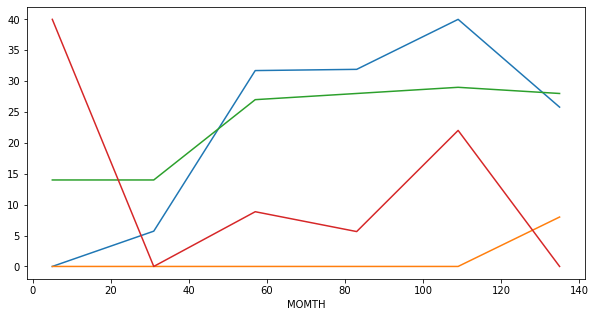

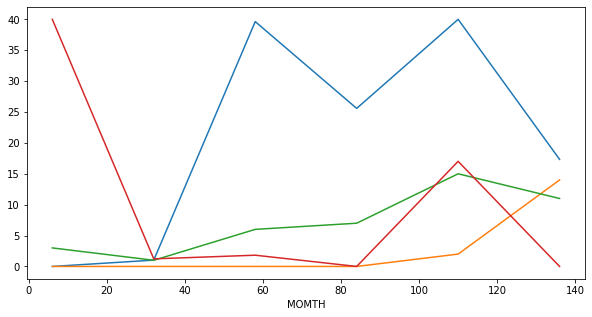

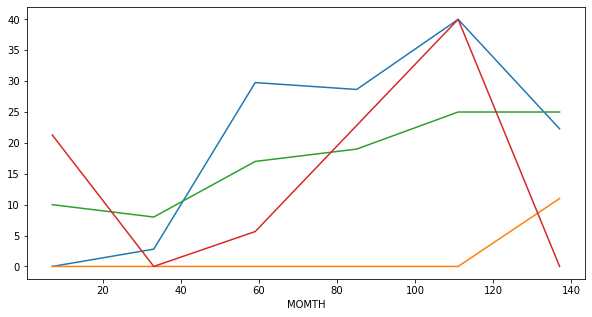

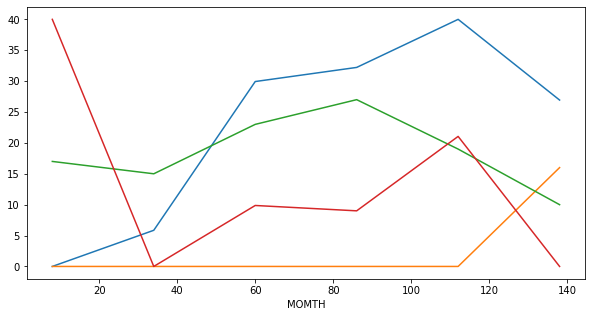

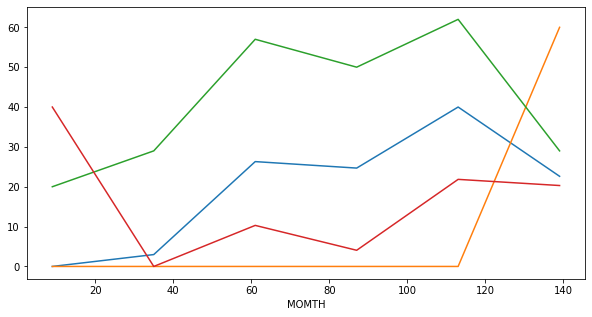

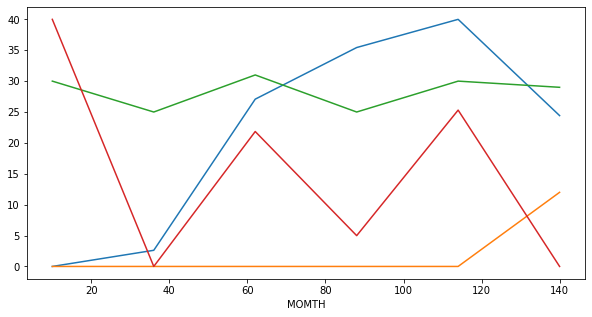

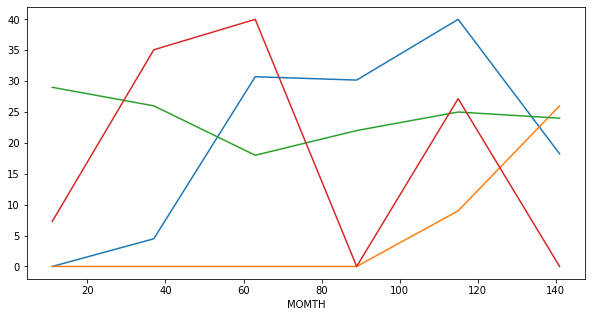

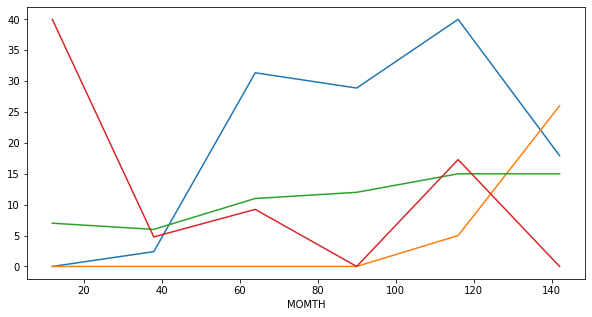

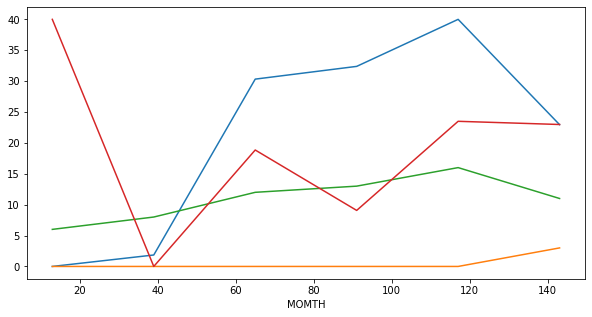

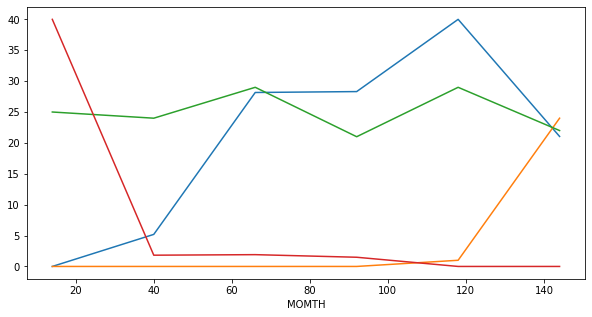

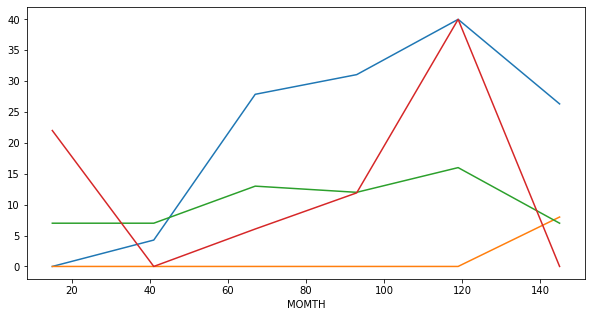

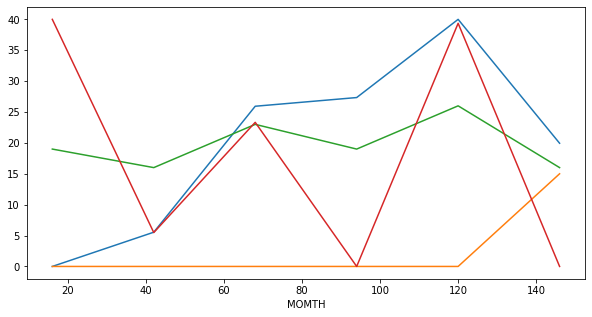

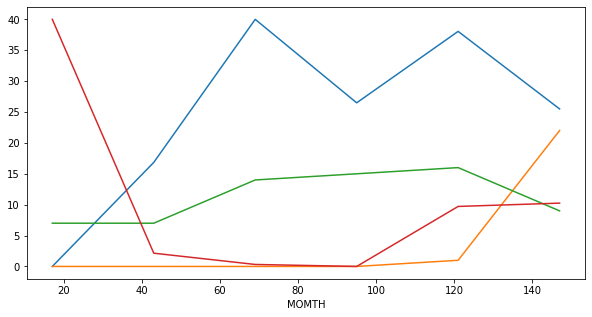

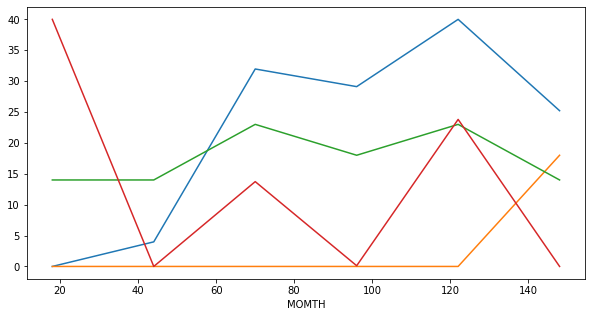

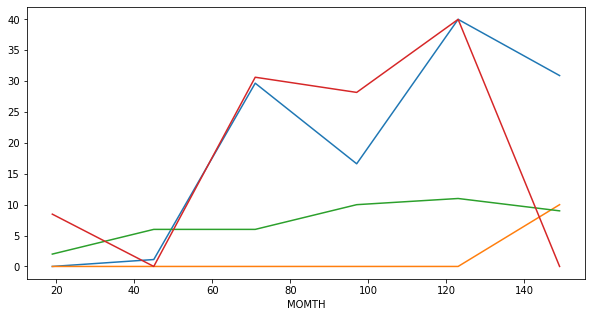

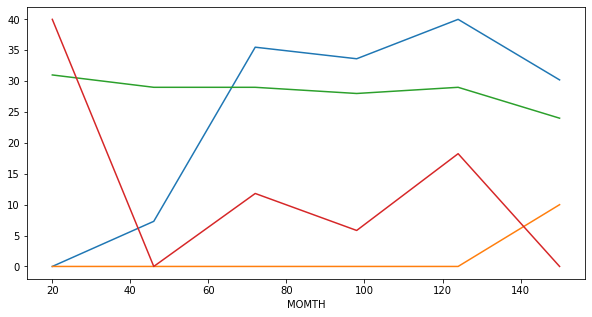

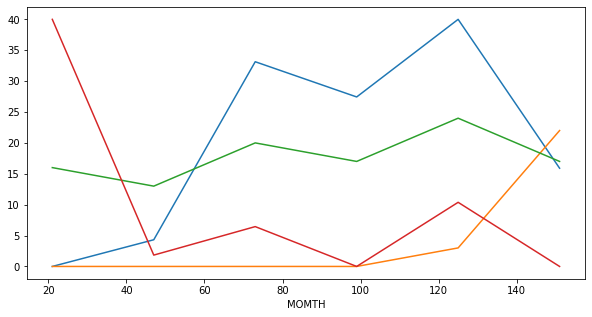

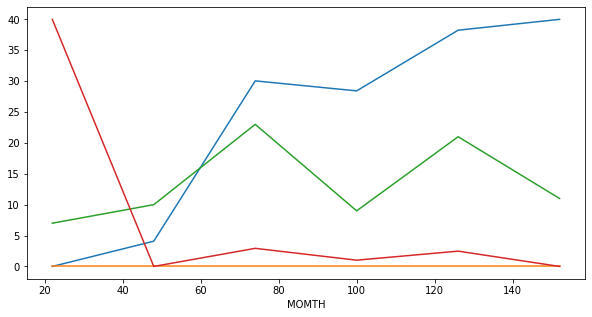

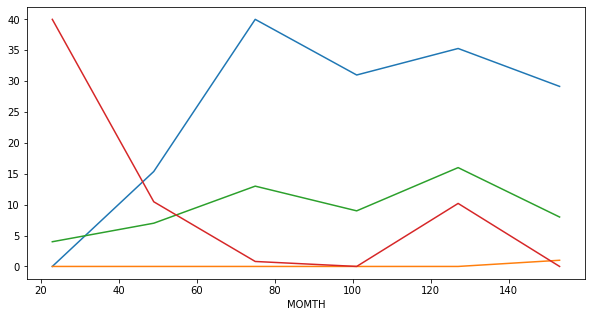

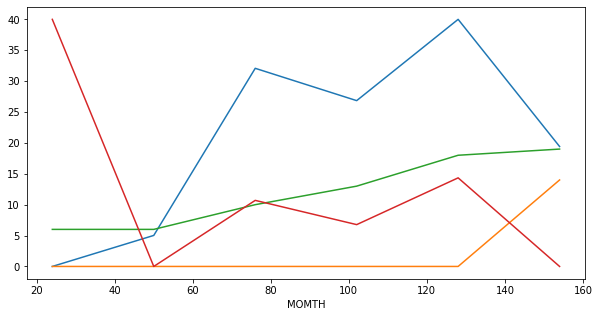

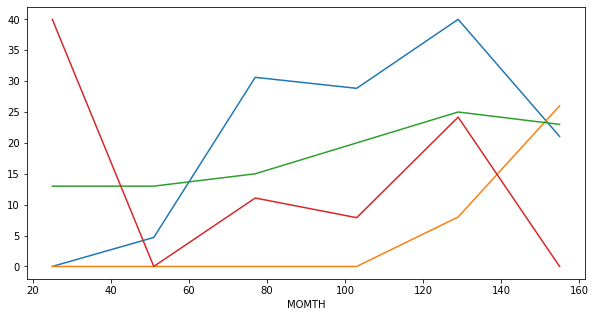

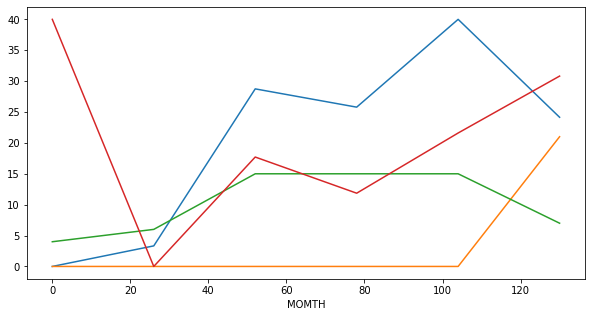

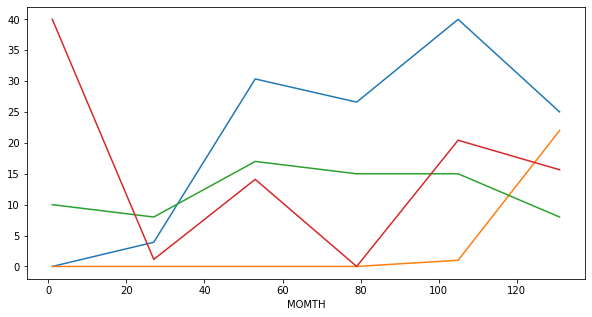

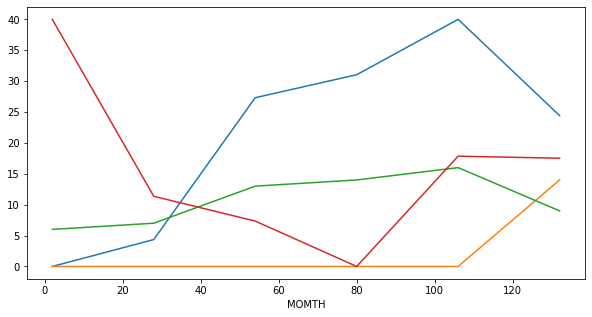

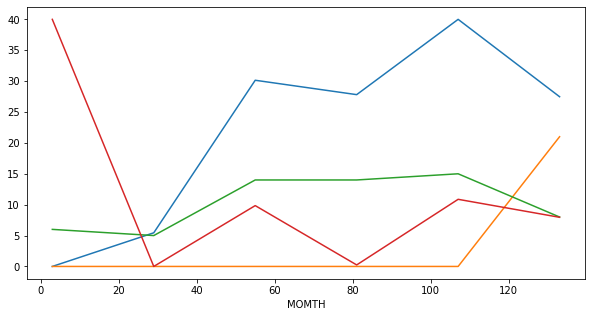

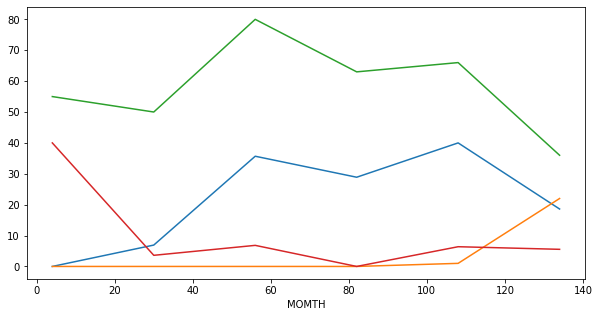

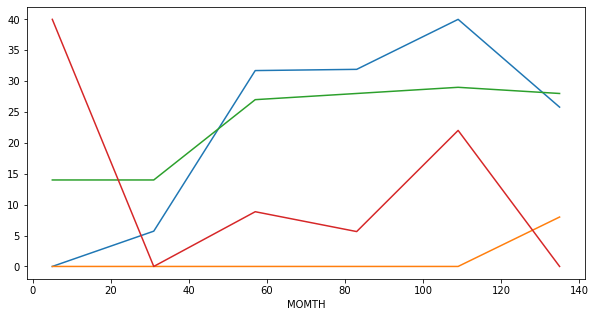

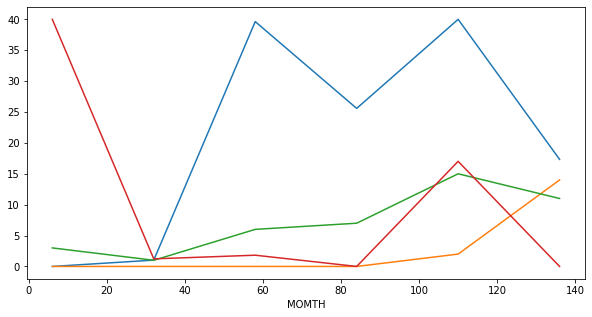

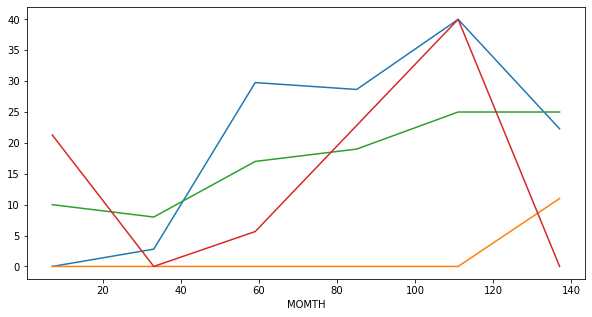

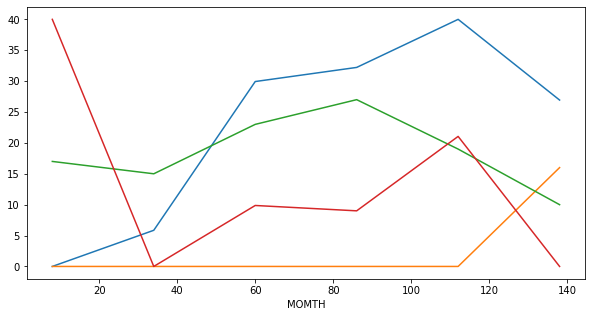

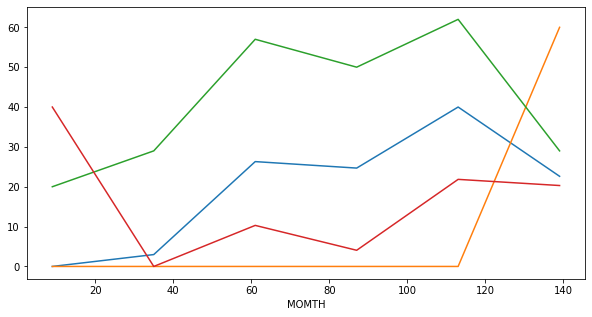

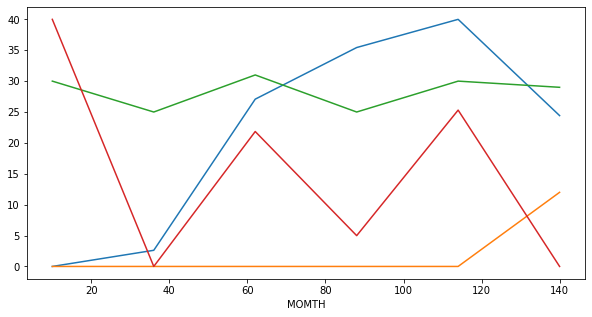

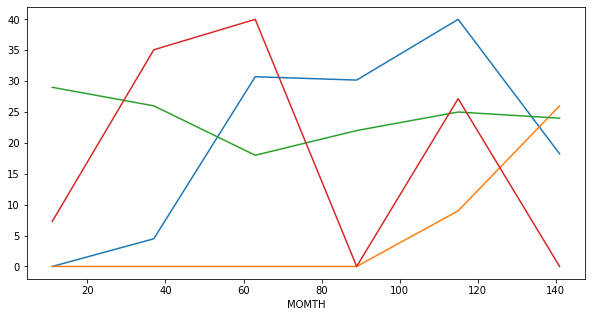

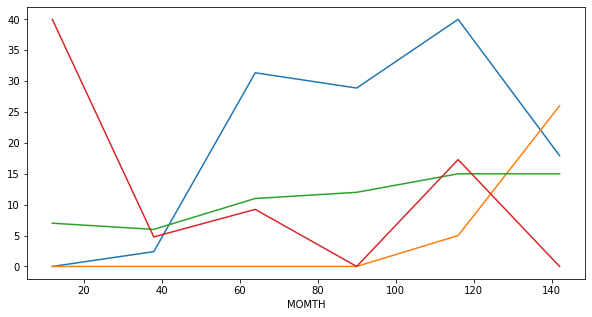

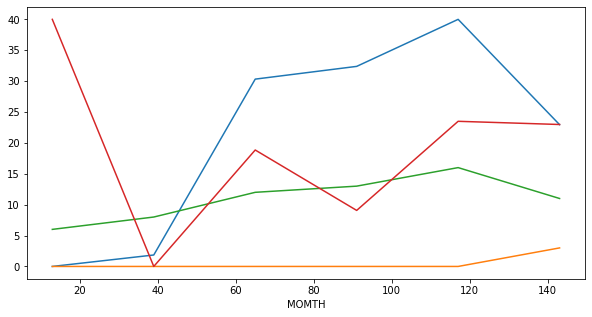

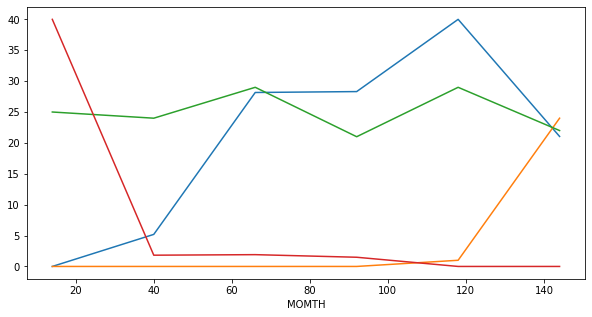

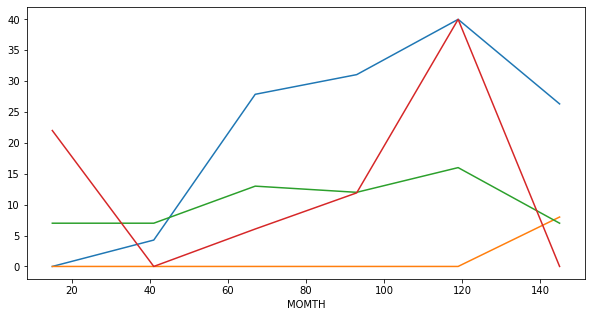

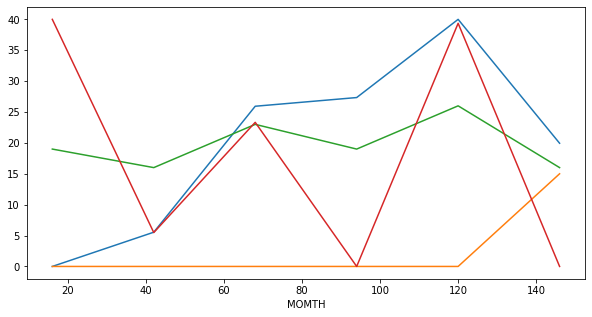

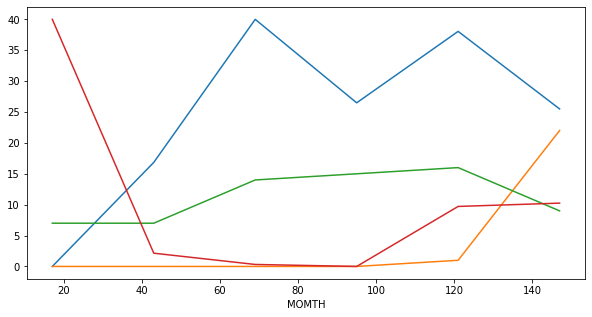

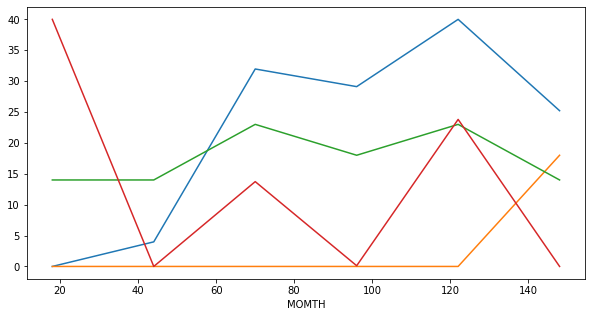

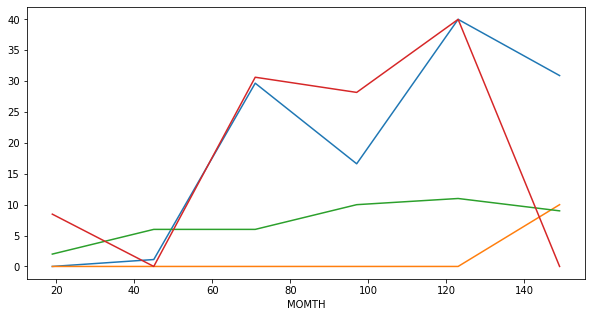

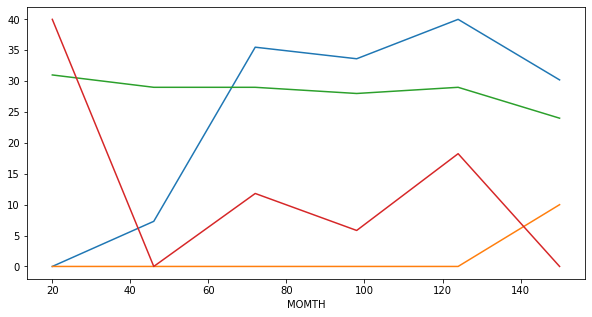

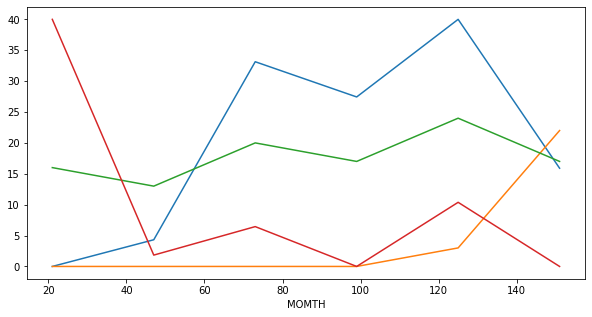

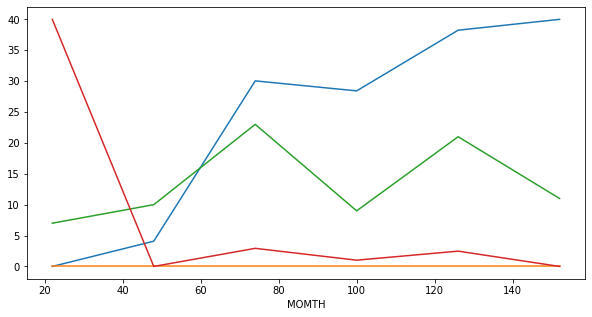

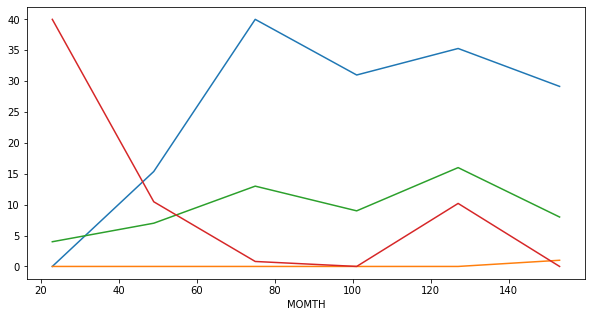

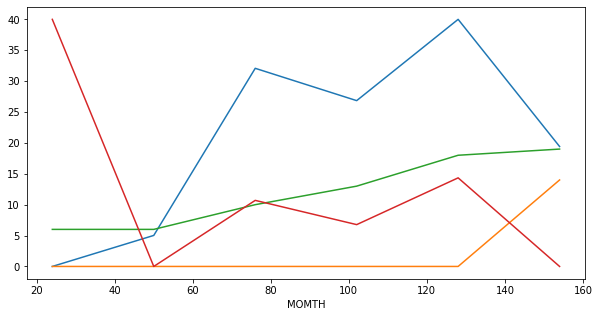

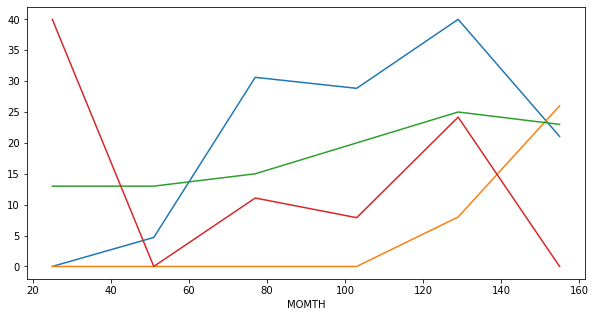

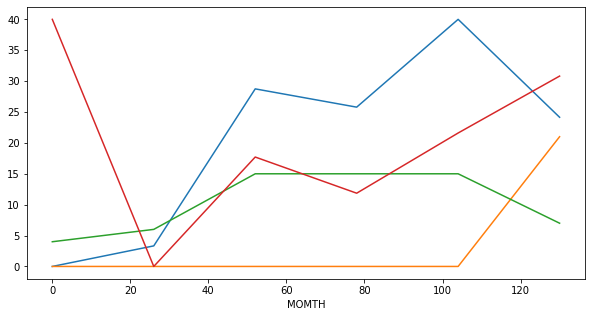

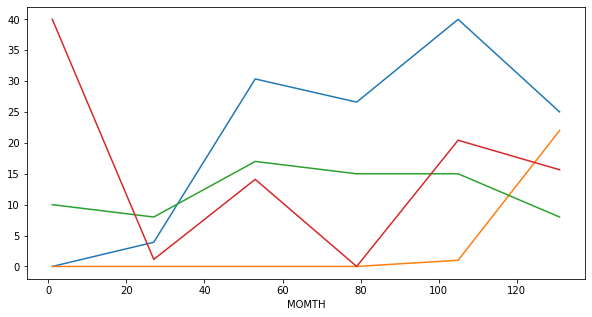

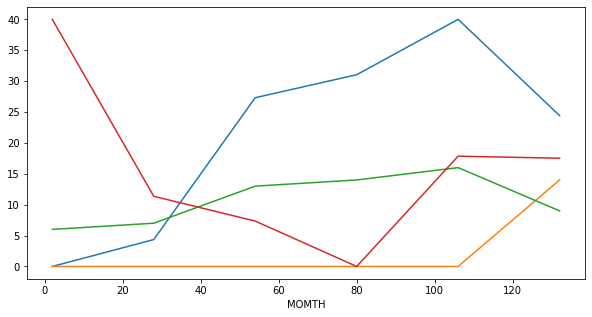

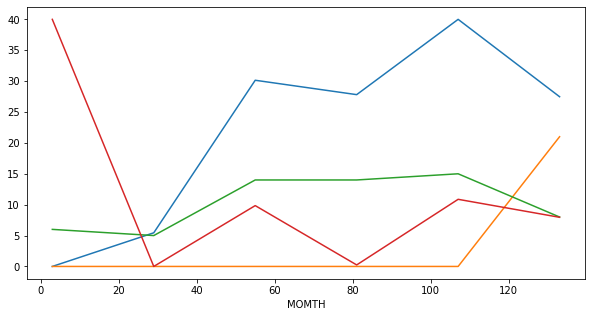

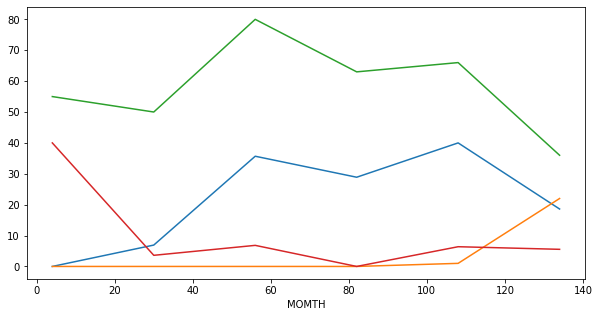

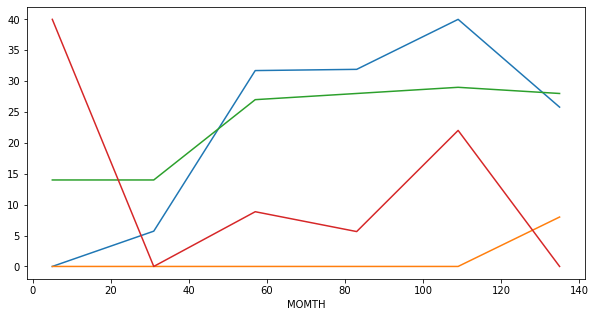

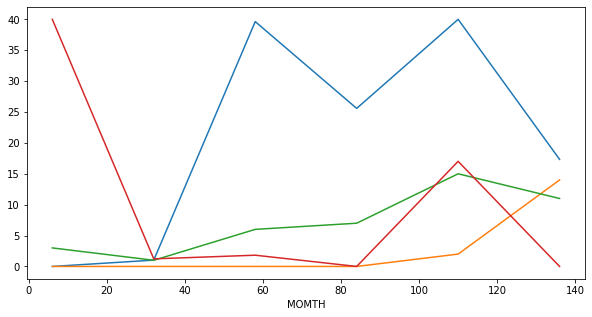

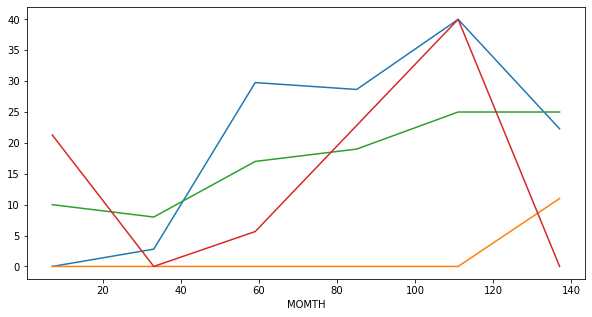

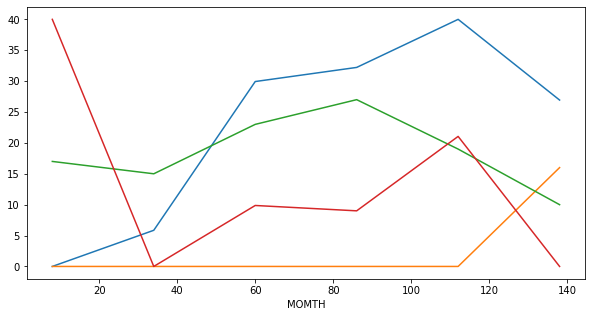

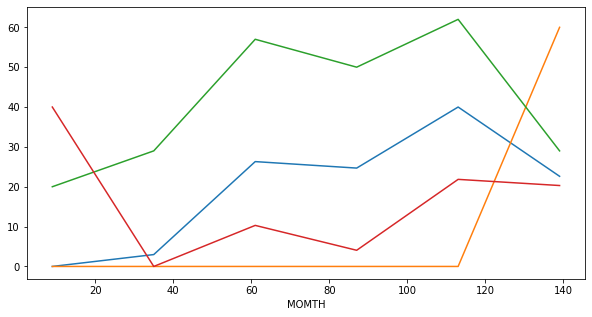

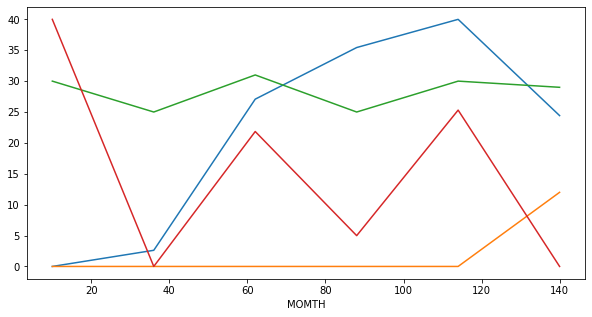

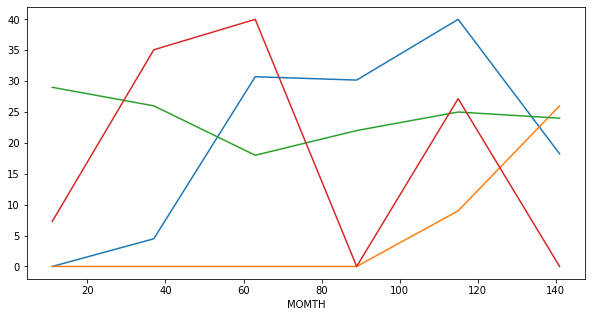

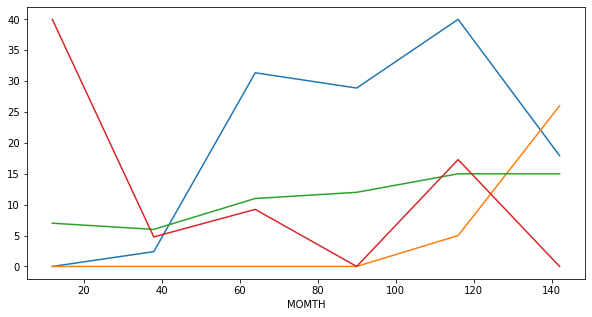

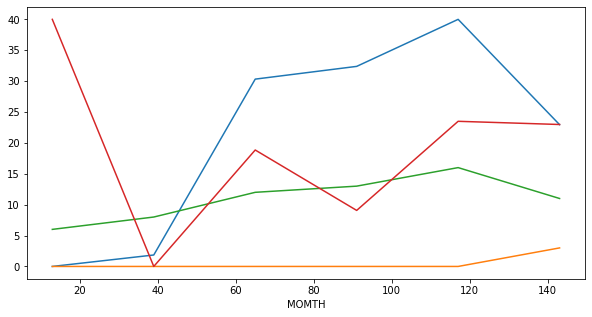

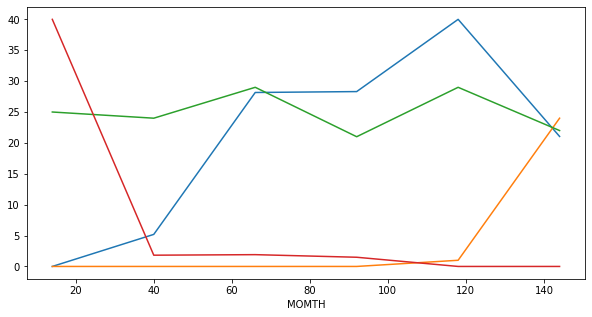

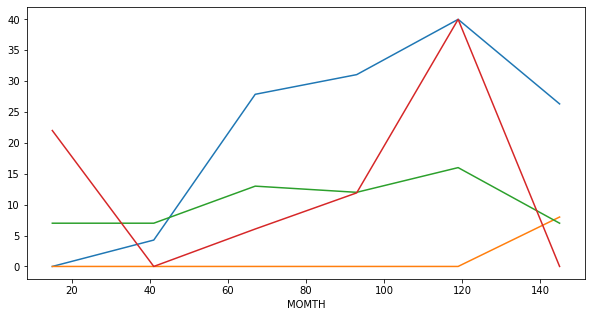

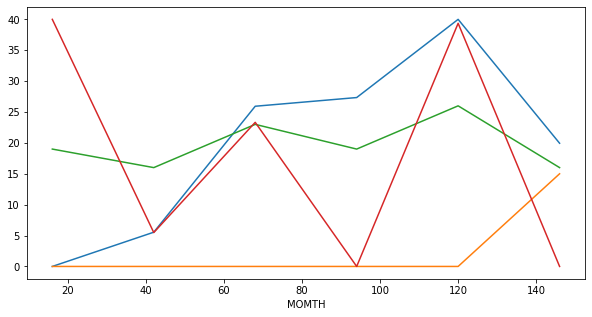

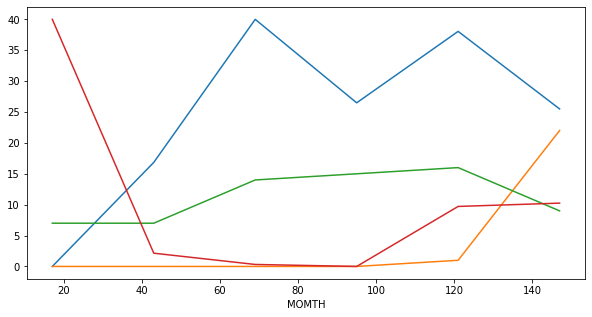

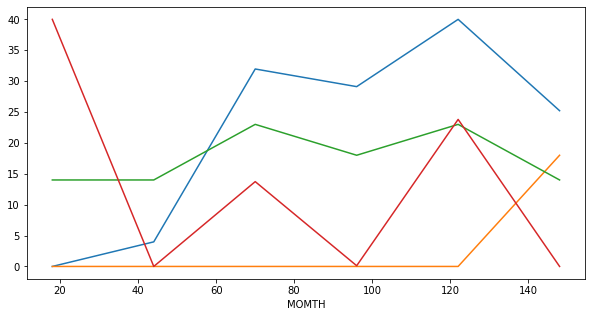

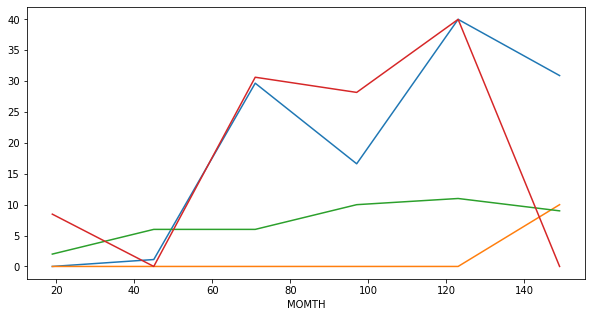

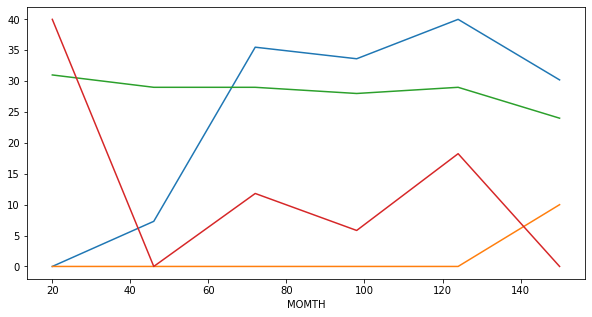

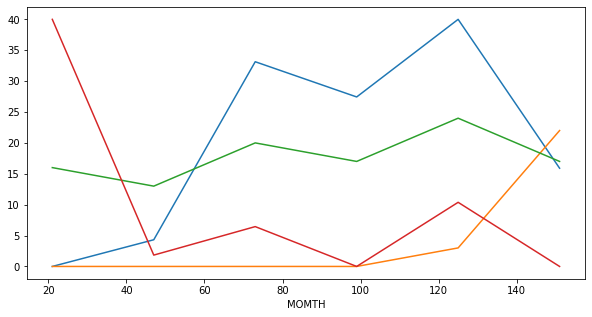

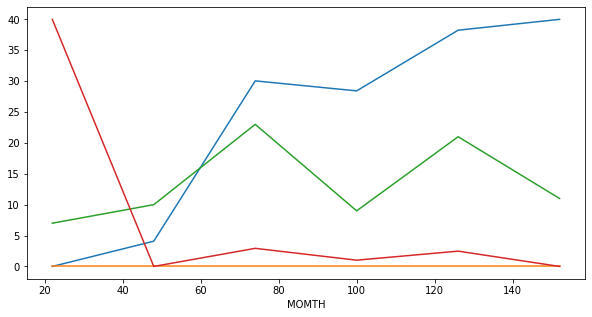

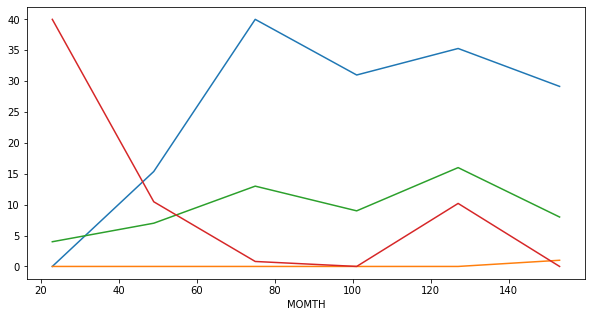

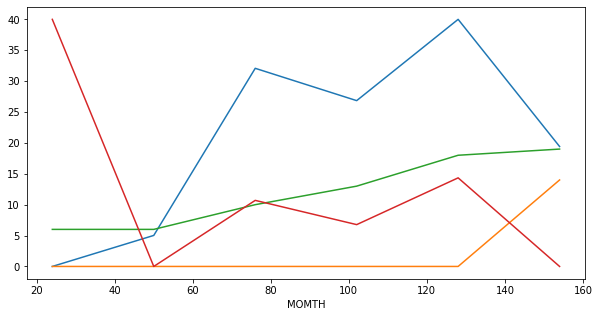

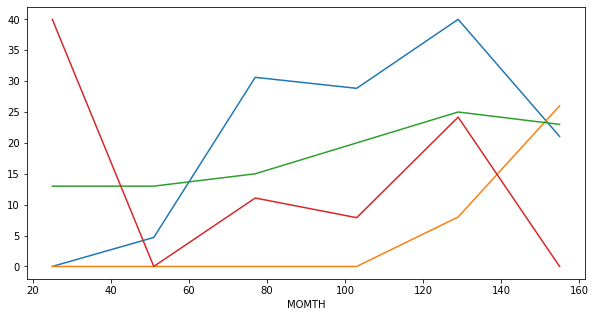

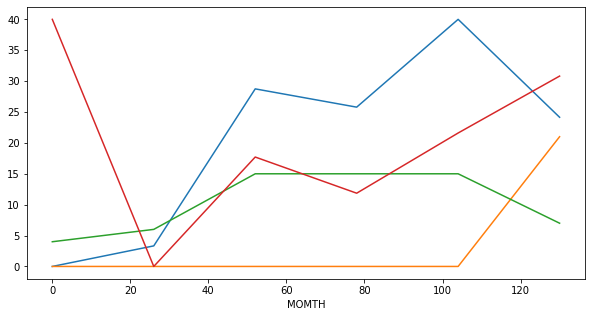

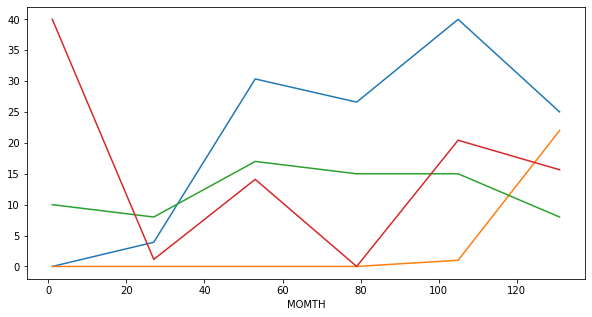

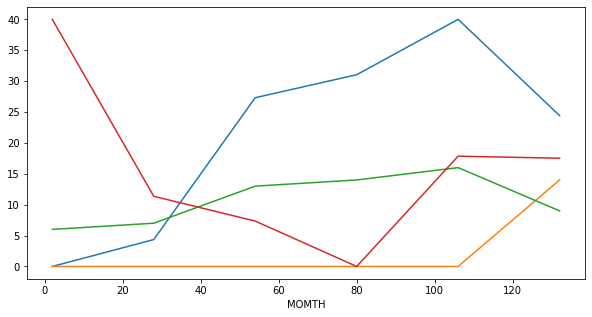

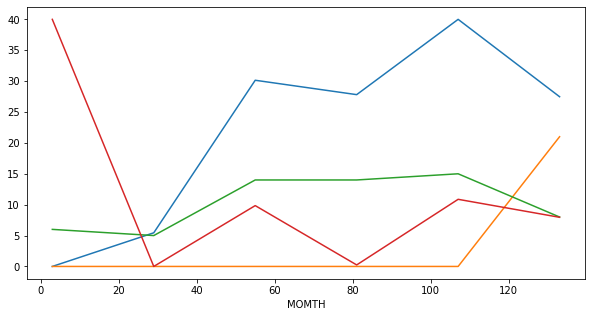

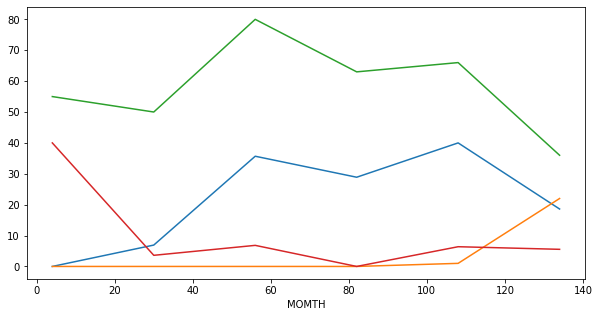

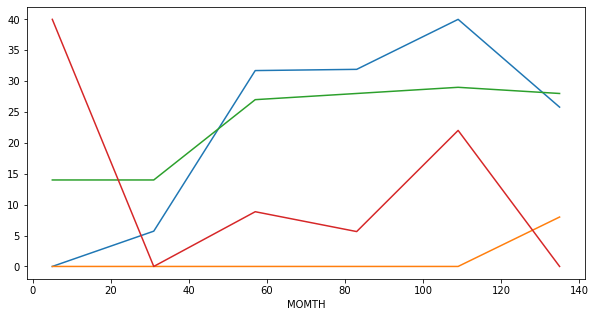

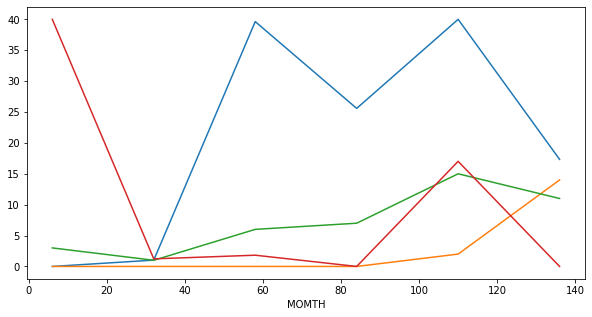

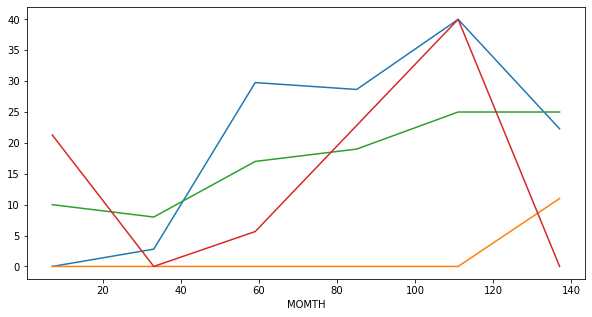

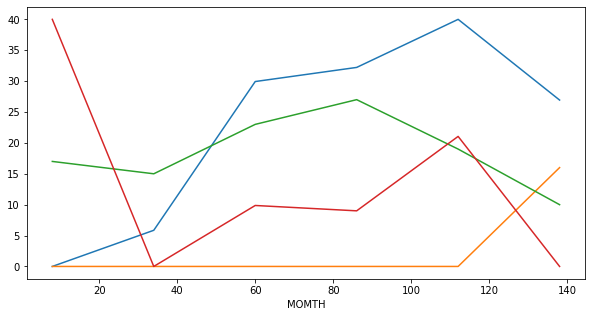

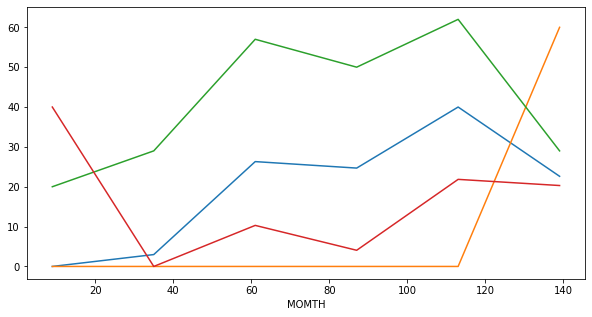

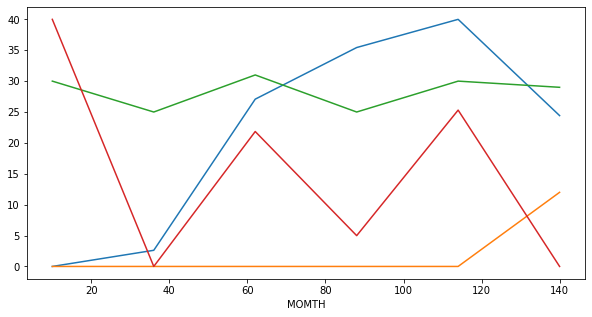

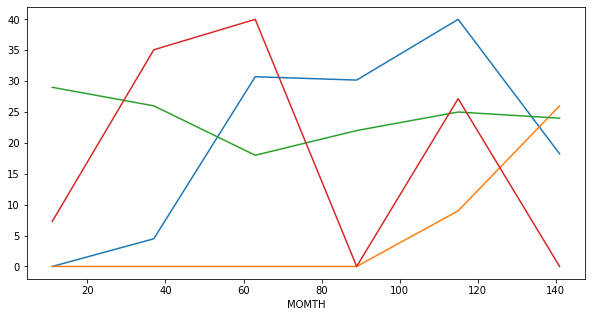

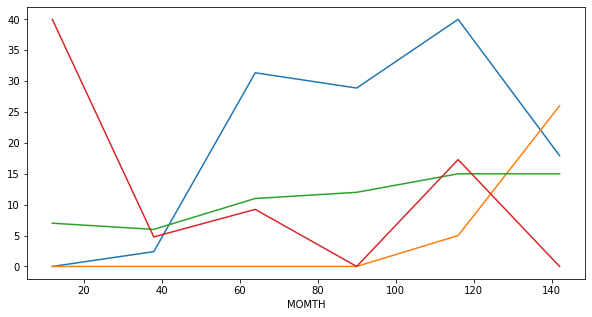

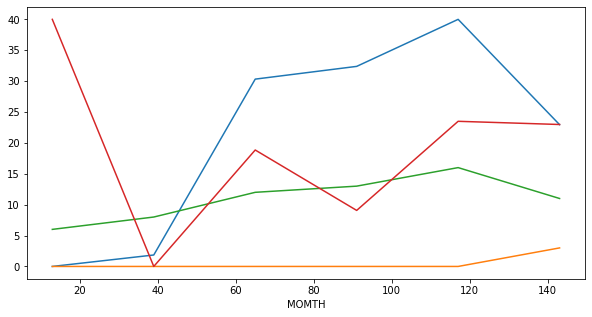

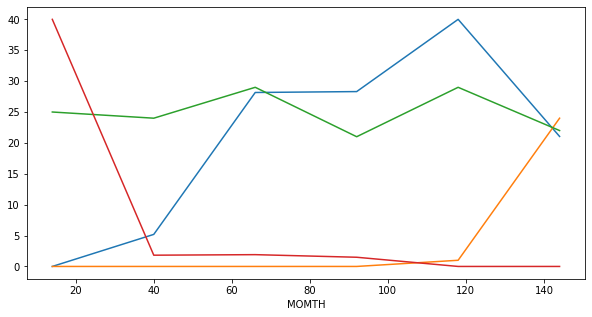

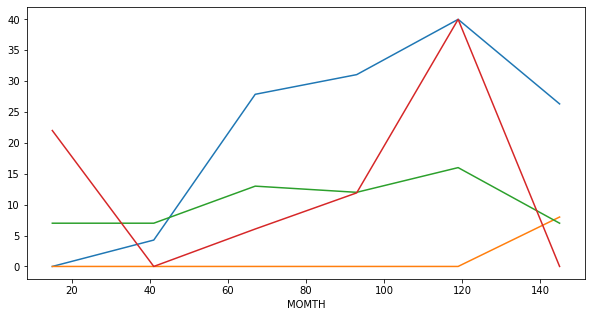

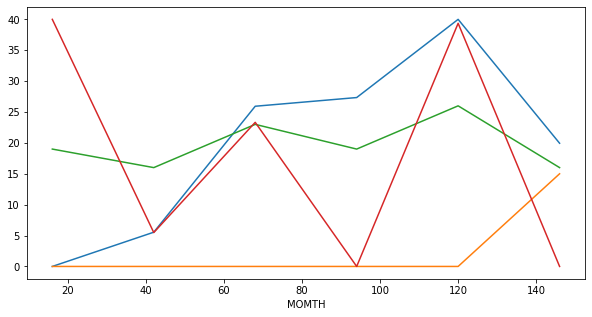

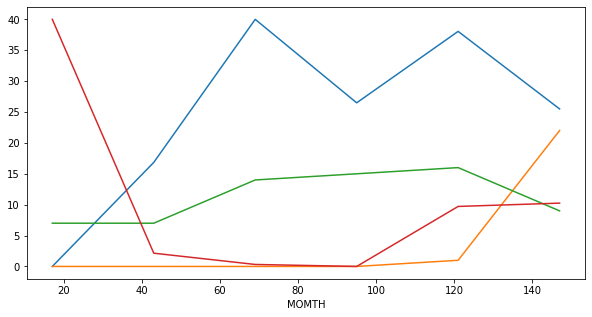

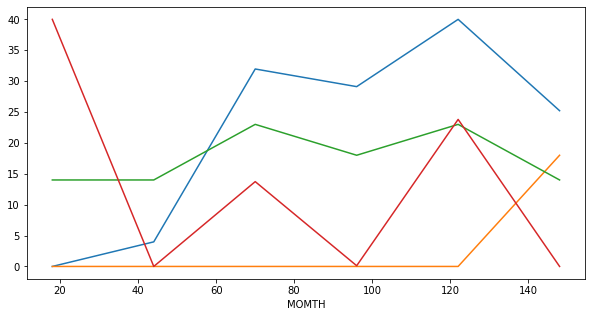

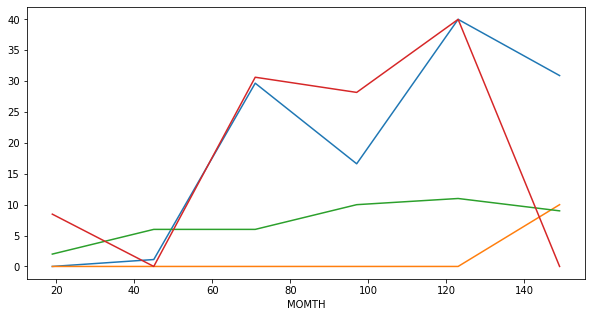

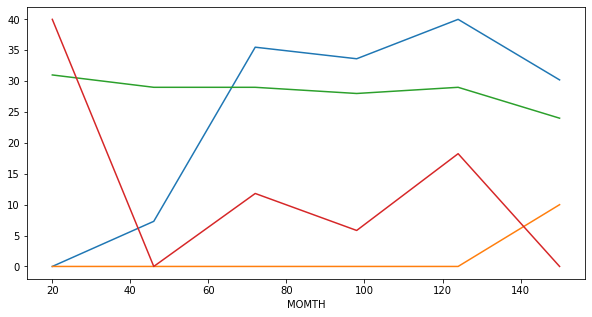

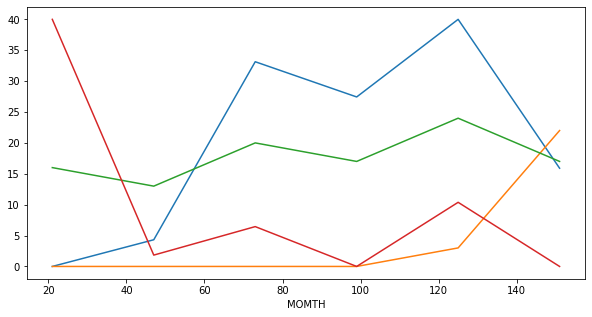

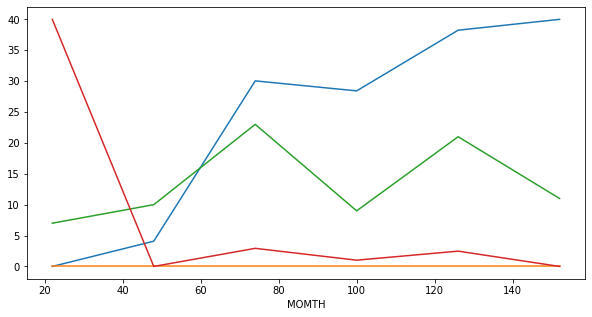

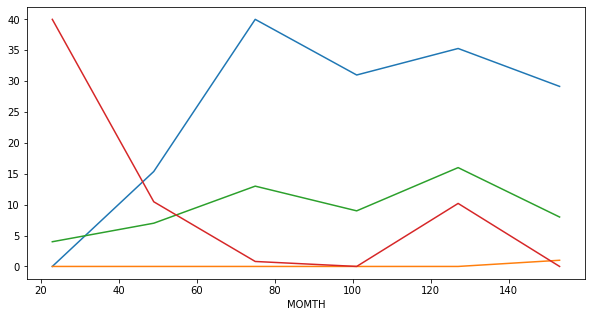

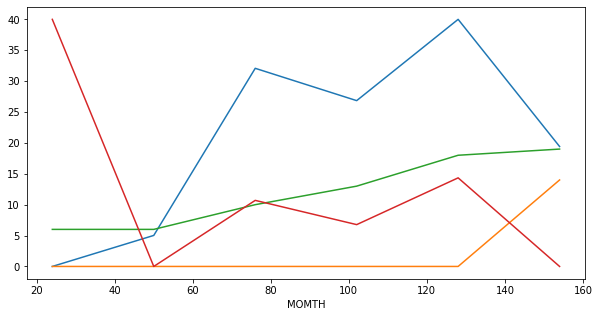

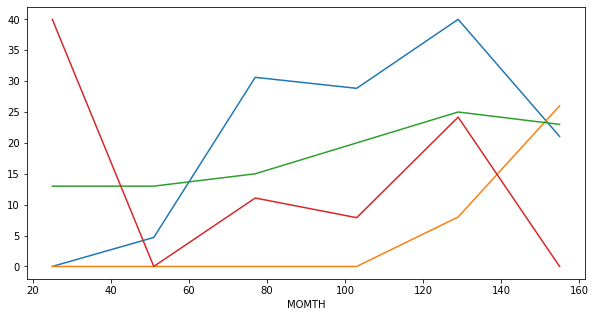

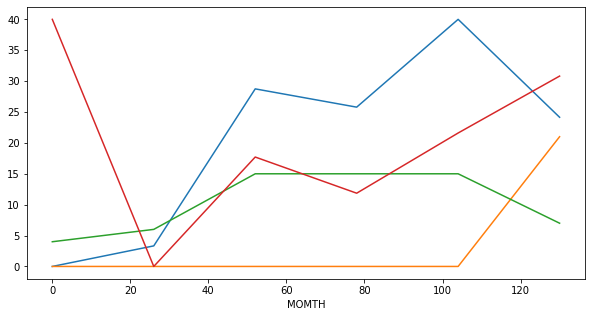

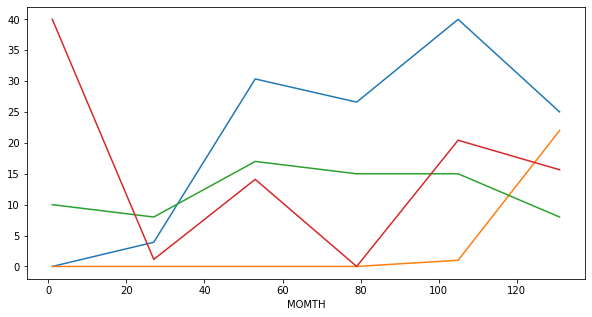

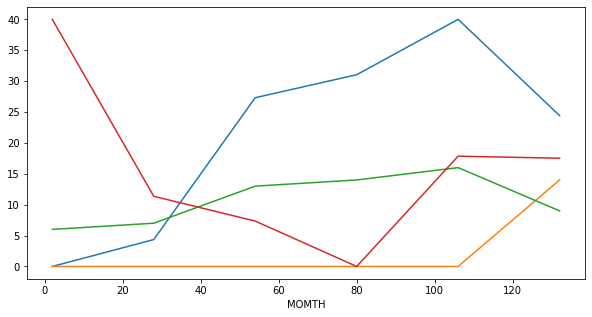

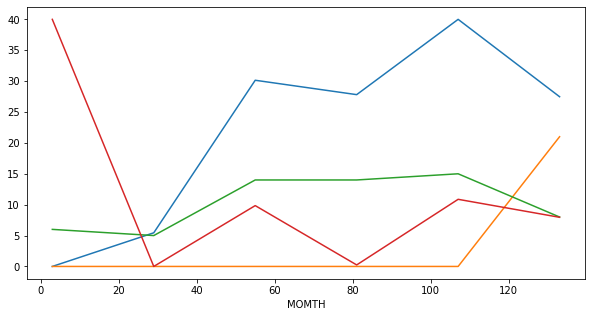

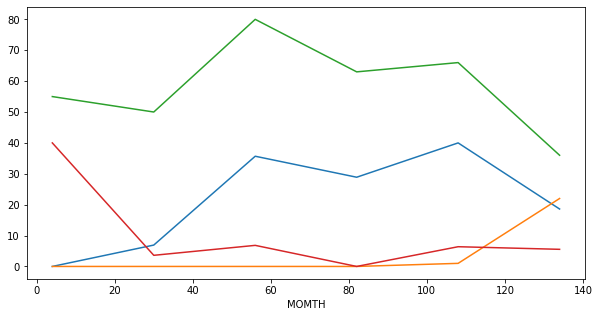

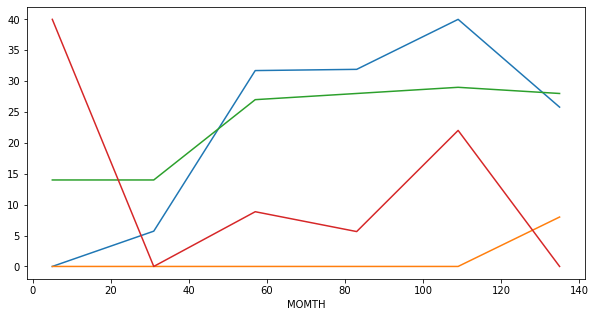

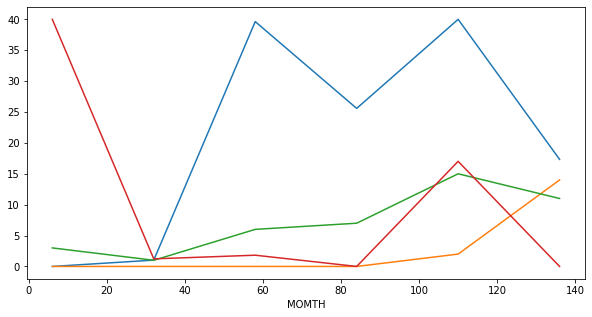

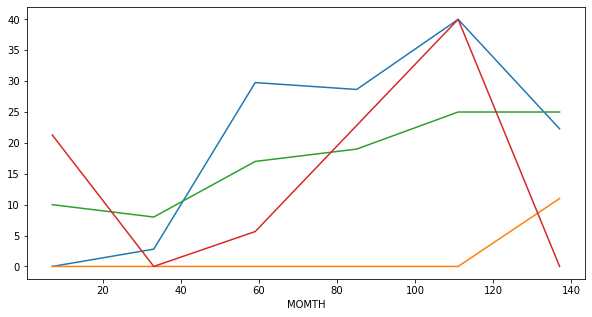

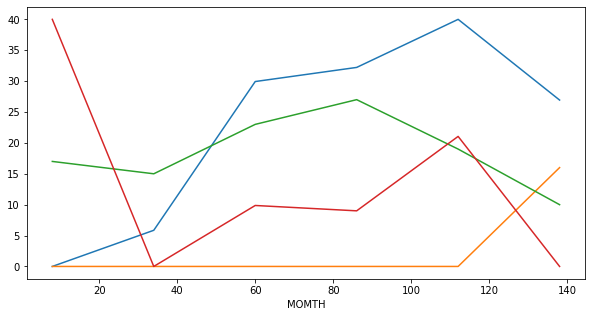

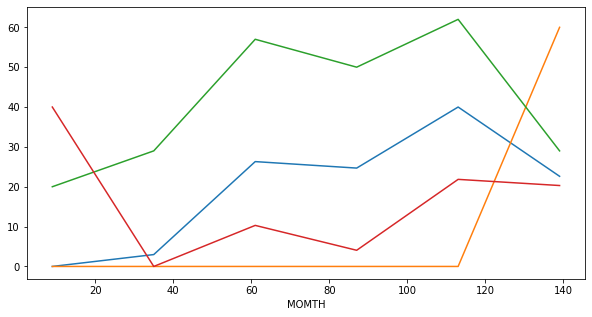

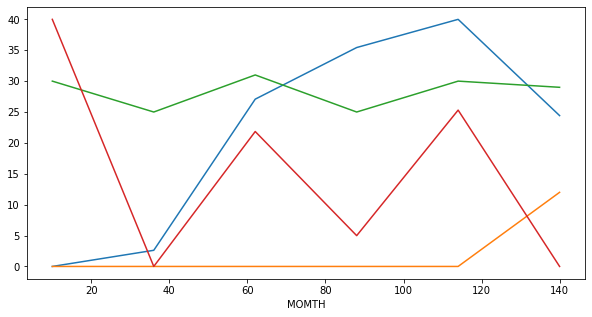

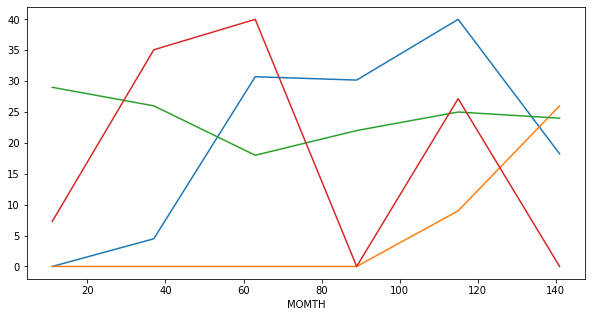

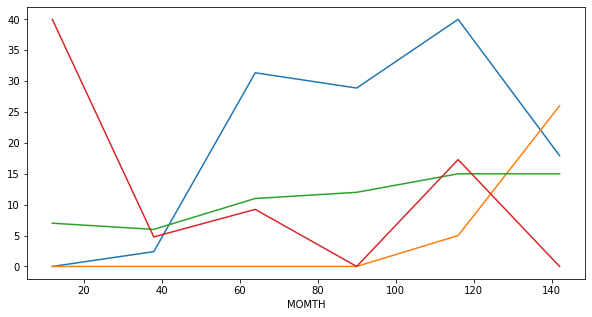

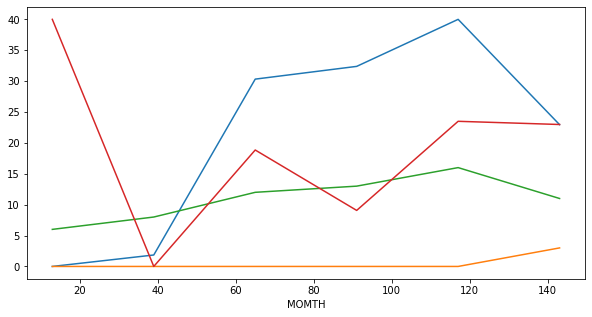

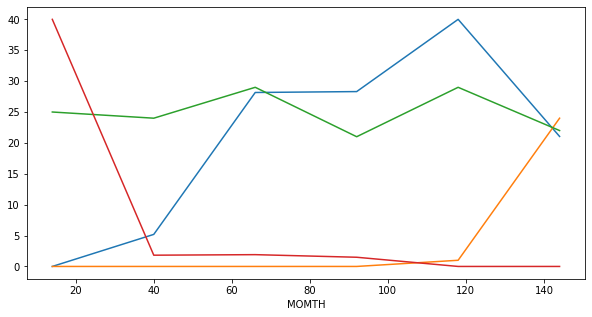

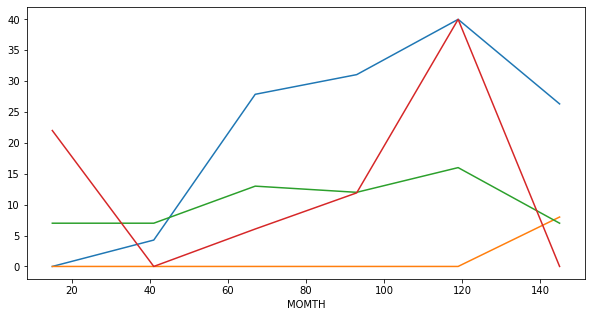

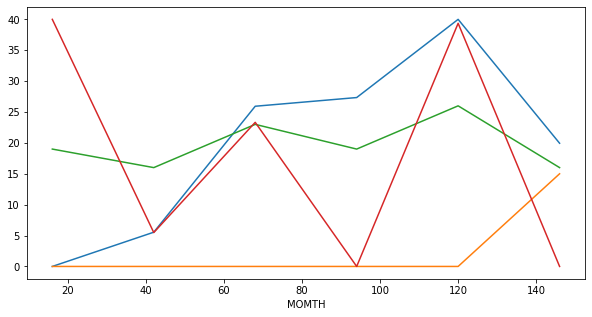

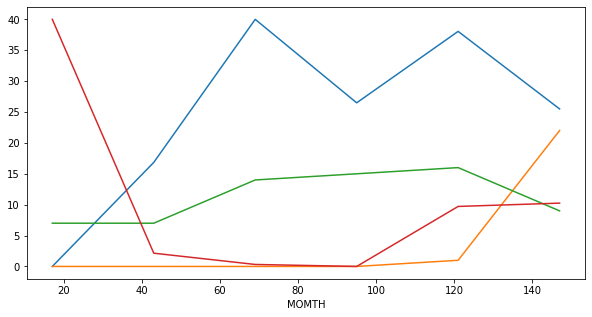

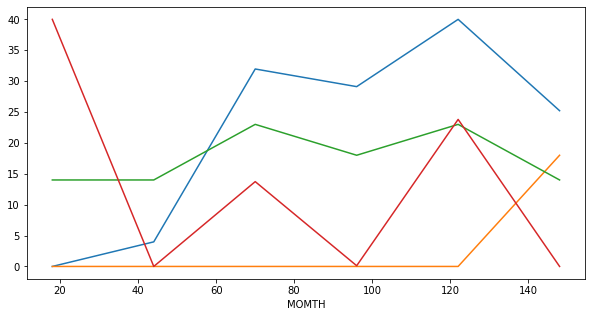

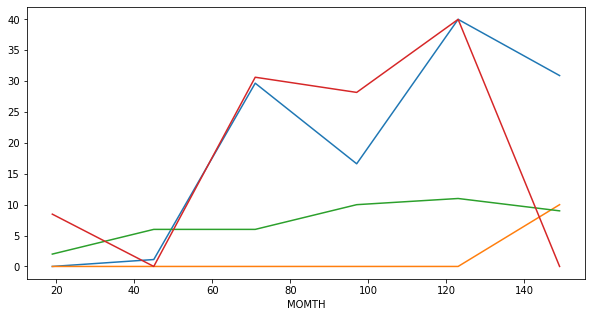

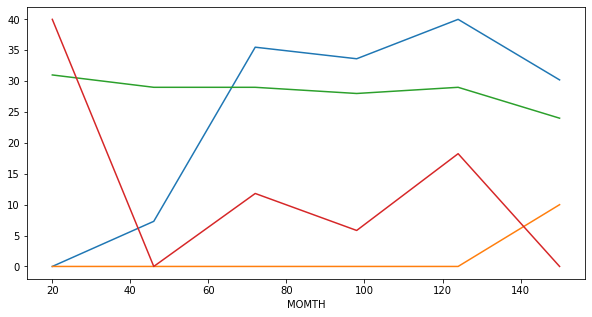

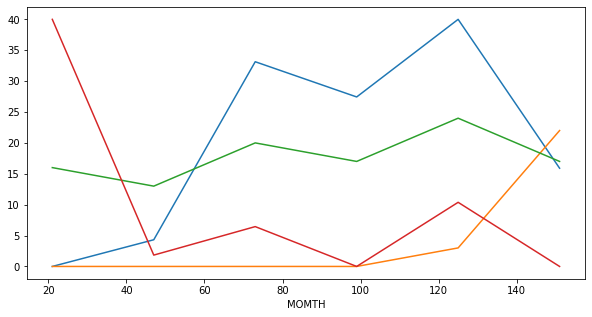

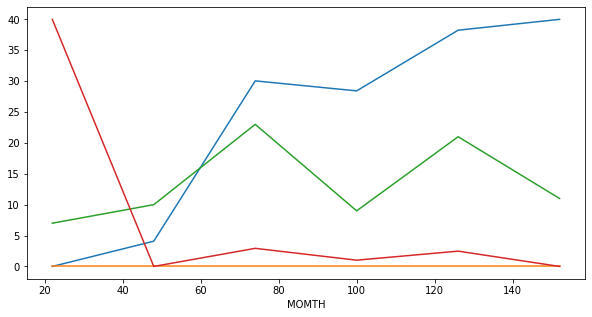

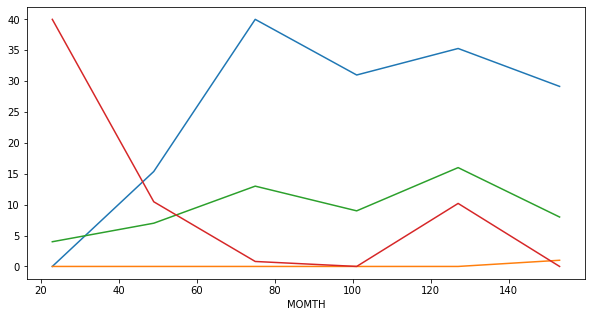

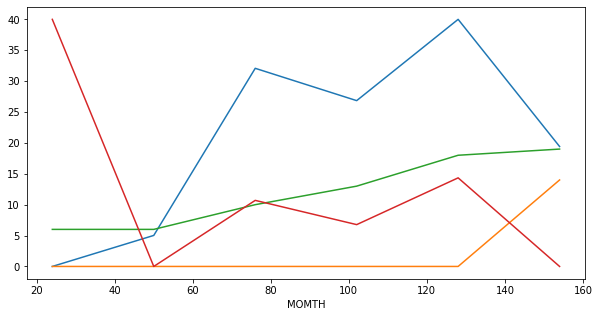

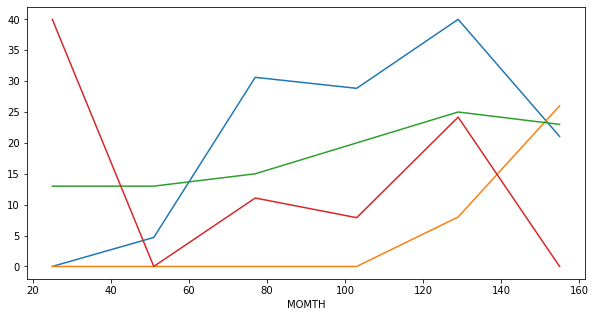

In [114]:
# gdf['num'] = min_max_scaler.fit_transform(gdf[['num']])
#gdfx = pd.DataFrame(gdf_minmax,columns = gdf1columns,index = gdf.index )
for i in gdf['鄉鎮市區']:
   tmp_df = gdf[gdf['鄉鎮市區'] == i].sort_values(by= '月份')
   tmp_df['num'] = min_max_scaler.fit_transform(tmp_df[['num']])
#    print(tmp_df)
   fig = plt.figure(figsize=(10,5))
   l1 = plt.plot(tmp_df['num'])
   l2 = plt.plot(tmp_df['over30C'])
   l3 = plt.plot(tmp_df['rain'])
   l4 = plt.plot(tmp_df['garbage'])
   
#    plt.legend(loc='upper left')
   plt.xlabel('MOMTH')
#    plt.ylabel('')

In [ ]:
 a = 1
for i in gdf['鄉鎮市區']:
    fig = plt.figure(figsize=(10,5))
    l1 = plt.plot(gdf['num'])
    l1 = plt.plot(gdf['over30C'])
    l2 = plt.plot(gdf['rain'])
    l3 = plt.plot(gdf['garbage'])
    plt.title(f"Zone {a}")
    plt.legend([l1,l2,l3],["TEM_OVER_30","RAIN","GARBAGE"],loc='upper left')
    plt.xlabel('MOMTH')
    plt.ylabel('RAIN AND TEM_OVER_30 DAYS')
    a+=1